<a href="https://colab.research.google.com/github/iamZamil/Market-Anomaly-Detection/blob/main/Market_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt



# > Reading csv and extracting only the useful features



In [ ]:
df = pd.read_csv("cleanedData.csv")
df.head()

,Ticker,XAU BGNL Curncy,ECSURPUS Index,BDIY Index,CRY Index,DXY Curncy,JPY Curncy,GBP Curncy,Cl1 Comdty,VIX Index,...,TY1 Comdty,GC1 Comdty,CO1 Comdty,ES1 Index,VG1 Index,NQ1 Index,LLL1 Index,TP1 Index,DU1 Comdty,TU2 Comdty
0,NaN,284.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4/27/1999,282.25,NaN,995.0,134.65,100.63,120.44,1.617,17.81,23.36,...,115.563,282.3,15.80,1376.50,3726.0,NaN,NaN,1347.5,105.69,104.898
2,5/4/1999,285.55,NaN,1095.0,139.04,100.68,120.77,1.626,18.92,25.62,...,114.313,286.9,16.93,1343.00,3740.0,NaN,NaN,1328.5,105.58,104.664
3,5/11/1999,278.25,NaN,1121.0,136.78,100.24,121.07,1.621,18.06,25.62,...,113.344,278.8,15.96,1358.25,3690.0,NaN,NaN,1343.5,105.67,104.406
4,5/18/1999,273.95,NaN,1061.0,133.90,100.72,123.21,1.621,17.11,27.26,...,112.344,274.2,15.14,1341.25,3595.0,NaN,NaN,1323.5,105.60,104.141


In [ ]:
df.head(1)

,Ticker,XAU BGNL Curncy,ECSURPUS Index,BDIY Index,CRY Index,DXY Curncy,JPY Curncy,GBP Curncy,Cl1 Comdty,VIX Index,...,TY1 Comdty,GC1 Comdty,CO1 Comdty,ES1 Index,VG1 Index,NQ1 Index,LLL1 Index,TP1 Index,DU1 Comdty,TU2 Comdty
0,NaN,284.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
features = df[["XAU BGNL Curncy", "ECSURPUS Index", "BDIY Index", "CRY Index", "DXY Curncy", "Cl1 Comdty","VIX Index", "USGG2YR Index", "GT10 Govt"]]

In [ ]:
df.head()

,Ticker,XAU BGNL Curncy,ECSURPUS Index,BDIY Index,CRY Index,DXY Curncy,JPY Curncy,GBP Curncy,Cl1 Comdty,VIX Index,...,TY1 Comdty,GC1 Comdty,CO1 Comdty,ES1 Index,VG1 Index,NQ1 Index,LLL1 Index,TP1 Index,DU1 Comdty,TU2 Comdty
0,NaN,284.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4/27/1999,282.25,NaN,995.0,134.65,100.63,120.44,1.617,17.81,23.36,...,115.563,282.3,15.80,1376.50,3726.0,NaN,NaN,1347.5,105.69,104.898
2,5/4/1999,285.55,NaN,1095.0,139.04,100.68,120.77,1.626,18.92,25.62,...,114.313,286.9,16.93,1343.00,3740.0,NaN,NaN,1328.5,105.58,104.664
3,5/11/1999,278.25,NaN,1121.0,136.78,100.24,121.07,1.621,18.06,25.62,...,113.344,278.8,15.96,1358.25,3690.0,NaN,NaN,1343.5,105.67,104.406
4,5/18/1999,273.95,NaN,1061.0,133.90,100.72,123.21,1.621,17.11,27.26,...,112.344,274.2,15.14,1341.25,3595.0,NaN,NaN,1323.5,105.60,104.141


In [ ]:
features

,XAU BGNL Curncy,ECSURPUS Index,BDIY Index,CRY Index,DXY Curncy,Cl1 Comdty,VIX Index,USGG2YR Index,GT10 Govt
0,284.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,282.25,NaN,995.0,134.650,100.630,17.81,23.36,4.998,5.205
2,285.55,NaN,1095.0,139.040,100.680,18.92,25.62,5.088,5.405
3,278.25,NaN,1121.0,136.780,100.240,18.06,25.62,5.173,5.578
4,273.95,NaN,1061.0,133.900,100.720,17.11,27.26,5.345,5.661
...,...,...,...,...,...,...,...,...,...
1144,1727.96,0.339,2271.0,184.502,92.336,57.76,20.30,0.145,1.622
1145,1685.56,0.303,2103.0,184.874,93.297,60.55,19.61,0.147,1.706
1146,1743.28,0.440,2092.0,185.839,92.335,59.33,18.12,0.157,1.658
1147,1742.69,0.467,2140.0,188.137,91.852,60.18,16.65,0.159,1.616


**Fill NAN's**

In [ ]:
features = features.dropna()
#features.fillna(features.mean(),inplace=True)

In [ ]:
features = features.drop_duplicates()

In [ ]:
features

,XAU BGNL Curncy,ECSURPUS Index,BDIY Index,CRY Index,DXY Curncy,Cl1 Comdty,VIX Index,USGG2YR Index,GT10 Govt
38,283.25,0.077,1388.0,157.260,100.560,25.77,22.50,6.428,6.657
39,287.65,0.043,1405.0,165.010,101.860,28.85,21.50,6.465,6.748
40,287.15,0.135,1368.0,167.240,102.410,28.28,23.02,6.432,6.692
41,282.75,0.191,1311.0,166.850,104.920,28.22,23.45,6.574,6.619
42,298.40,0.312,1277.0,165.430,104.220,28.02,21.25,6.678,6.613
...,...,...,...,...,...,...,...,...,...
1144,1727.96,0.339,2271.0,184.502,92.336,57.76,20.30,0.145,1.622
1145,1685.56,0.303,2103.0,184.874,93.297,60.55,19.61,0.147,1.706
1146,1743.28,0.440,2092.0,185.839,92.335,59.33,18.12,0.157,1.658
1147,1742.69,0.467,2140.0,188.137,91.852,60.18,16.65,0.159,1.616


# Scale the Data using Standard Scaler

In [ ]:
#from sklearn.preprocessing import MinMaxScaler

In [ ]:
scalar = StandardScaler()
scaled_features = scalar.fit_transform(features)

# scalar = MinMaxScaler()
# model = scalar.fit(features)
# scaled_features = model.transform(features)

In [ ]:
print(features.describe())

       XAU BGNL Curncy  ECSURPUS Index    BDIY Index    CRY Index  \
count      1111.000000     1111.000000   1111.000000  1111.000000   
mean        987.463744        0.036153   2259.860486   245.247671   
std         494.623740        0.349453   2017.811888    68.278065   
min         256.680000       -0.974000    291.000000   106.293000   
25%         433.740000       -0.191000    990.000000   184.705500   
50%        1137.800000        0.035000   1518.000000   234.560000   
75%        1324.825000        0.260500   2685.500000   301.539500   
max        2006.910000        0.991000  11793.000000   467.570000   

        DXY Curncy   Cl1 Comdty    VIX Index  USGG2YR Index    GT10 Govt  
count  1111.000000  1111.000000  1111.000000    1111.000000  1111.000000  
mean     90.934982    60.708101    19.992169       1.990379     3.266748  
std      11.379095    25.900813     8.642157       1.710305     1.332464  
min      71.329000    10.010000     9.430000       0.107000     0.508000  
25%

In [ ]:
scaled_features

array([[-1.42437742,  0.11694086, -0.43227673, ...,  0.29031644,
         2.59580503,  2.54549411],
       [-1.41547776,  0.01960224, -0.42384797, ...,  0.17455247,
         2.61744834,  2.6138194 ],
       [-1.41648909,  0.2829891 , -0.44219292, ...,  0.3505137 ,
         2.59814485,  2.57177307],
       ...,
       [ 1.5287512 ,  1.1561738 , -0.08322683, ..., -0.21672973,
        -1.07244269, -1.20789206],
       [ 1.52755784,  1.23347212, -0.05942797, ..., -0.38690276,
        -1.07127278, -1.23942681],
       [ 1.60245654,  1.30504463,  0.08534841, ..., -0.17736998,
        -1.07595242, -1.277719  ]])

# Plot the features to see outliers

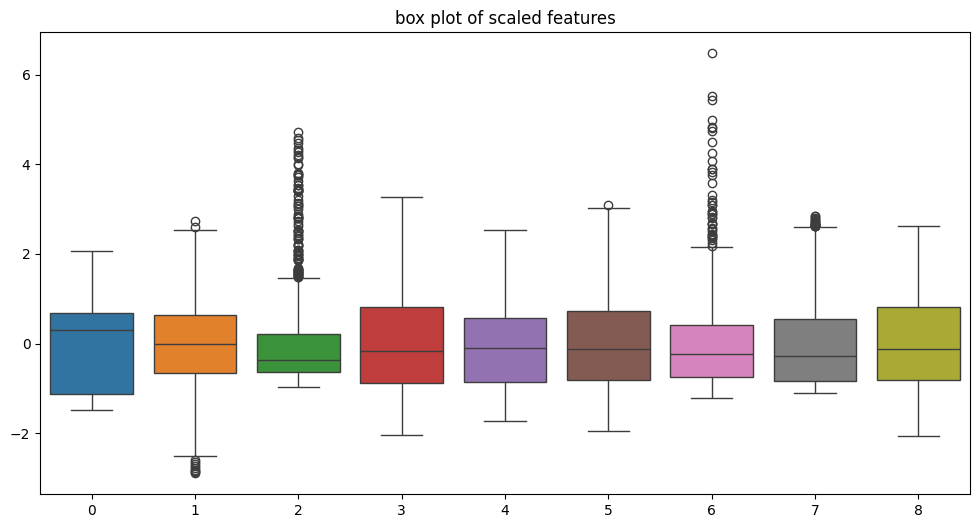

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=scaled_features)
plt.title("box plot of scaled features")
plt.show()

# Features Correlation

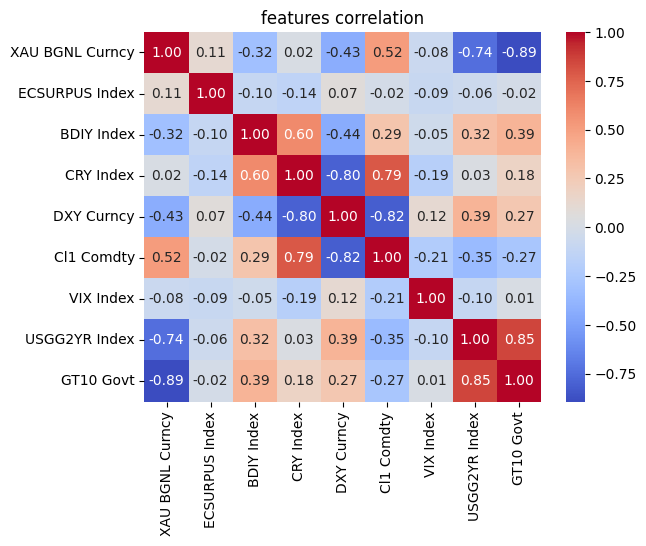

In [ ]:
corr_matrix = features.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("features correlation")
plt.show()

# Isolation Forest so that we can detect outliers

In [ ]:
iso_forest = IsolationForest(
    n_estimators = 200,
    max_samples="auto",
    contamination=0.2,
    random_state=42
)

In [ ]:
scaled_features

array([[-1.42437742,  0.11694086, -0.43227673, ...,  0.29031644,
         2.59580503,  2.54549411],
       [-1.41547776,  0.01960224, -0.42384797, ...,  0.17455247,
         2.61744834,  2.6138194 ],
       [-1.41648909,  0.2829891 , -0.44219292, ...,  0.3505137 ,
         2.59814485,  2.57177307],
       ...,
       [ 1.5287512 ,  1.1561738 , -0.08322683, ..., -0.21672973,
        -1.07244269, -1.20789206],
       [ 1.52755784,  1.23347212, -0.05942797, ..., -0.38690276,
        -1.07127278, -1.23942681],
       [ 1.60245654,  1.30504463,  0.08534841, ..., -0.17736998,
        -1.07595242, -1.277719  ]])

In [ ]:
iso_forest.fit(scaled_features)

IsolationForest(contamination=0.2, n_estimators=200, random_state=42)

In [ ]:
predictions = iso_forest.predict(scaled_features)
predictions

array([-1, -1, -1, ...,  1,  1,  1])

In [ ]:
anom_count = np.sum(predictions == -1)
print(anom_count)

222


In [ ]:
index = np.where(predictions < 0)
index

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   27,   28,   31,   32,   33,   34,   35,   36,
          38,   39,   40,   41,   42,   43,   44,   45,   46,   48,   49,
          50,   52,   64,   77,   88,   89,   90,   91,   92,   93,   94,
          95,   96,   97,   98,   99,  100,  101,  102,  105,  106,  107,
         108,  109,  110,  111,  112,  113,  114,  116,  117,  118,  131,
         132,  134,  143,  387,  394,  396,  400,  401,  402,  403,  404,
         405,  406,  407,  408,  409,  410,  411,  412,  413,  414,  415,
         416,  417,  419,  422,  423,  424,  425,  426,  427,  428,  429,
         430,  431,  432,  433,  434,  435,  436,  437,  438,  439,  440,
         441,  442,  443,  444,  445,  446,  447,  448,  449,  450,  451,
         452,  454,  455,  456,  457,  458,  459,  460,  461,  462,  463,
         464,  465,  466,  467,  468, 

# Added the anomalies as a feature in the unlabelled data

In [ ]:
features["anomaly"] = predictions

In [ ]:
anomalies = features[features["anomaly"] == -1]
print(anomalies) #211 rows


      XAU BGNL Curncy  ECSURPUS Index  BDIY Index  CRY Index  DXY Curncy  \
38             283.25           0.077      1388.0    157.260     100.560   
39             287.65           0.043      1405.0    165.010     101.860   
40             287.15           0.135      1368.0    167.240     102.410   
41             282.75           0.191      1311.0    166.850     104.920   
42             298.40           0.312      1277.0    165.430     104.220   
...               ...             ...         ...        ...         ...   
1125          1881.88           0.810      1200.0    153.553      92.749   
1126          1886.94           0.796      1112.0    154.522      92.416   
1127          1805.04           0.749      1178.0    159.791      92.226   
1128          1813.00           0.650      1211.0    158.939      91.313   
1133          1950.23           0.241      1418.0    171.705      89.436   

      Cl1 Comdty  VIX Index  USGG2YR Index  GT10 Govt  anomaly  
38         25.77      

In [ ]:
features.head(30) #1149 rows

,XAU BGNL Curncy,ECSURPUS Index,BDIY Index,CRY Index,DXY Curncy,Cl1 Comdty,VIX Index,USGG2YR Index,GT10 Govt,anomaly
38,283.25,0.077,1388.0,157.26,100.56,25.77,22.50,6.428,6.657,-1
39,287.65,0.043,1405.0,165.01,101.86,28.85,21.50,6.465,6.748,-1
40,287.15,0.135,1368.0,167.24,102.41,28.28,23.02,6.432,6.692,-1
41,282.75,0.191,1311.0,166.85,104.92,28.22,23.45,6.574,6.619,-1
42,298.40,0.312,1277.0,165.43,104.22,28.02,21.25,6.678,6.613,-1
43,303.90,0.391,1393.0,169.58,104.69,30.06,22.92,6.628,6.552,-1
44,305.50,0.497,1481.0,168.86,103.28,29.62,25.86,6.551,6.361,-1
45,293.30,0.497,1531.0,170.20,105.92,30.43,23.37,6.521,6.409,-1
46,292.00,0.484,1602.0,179.94,106.01,34.13,24.31,6.486,6.373,-1
47,289.60,0.488,1645.0,175.67,105.20,31.69,24.41,6.468,6.292,-1


# Features have 1149 rows and 211 are expected to be anomalies. Actual anomalies are 237

In [ ]:
scores = iso_forest.decision_function(scaled_features)

In [ ]:
print("predictions : ",predictions)
print("scores : ", scores)

predictions :  [-1 -1 -1 ...  1  1  1]
scores :  [-0.04641809 -0.03833964 -0.03689627 ...  0.0297196   0.02858308
  0.01510458]


# Creating Classification Report with Labeled data and unlabeled data which is labeled by the model, actual anomalies : 237, predicted: 211

In [ ]:
unlabel_df = features
unlabel_df.head(20)

,XAU BGNL Curncy,ECSURPUS Index,BDIY Index,CRY Index,DXY Curncy,Cl1 Comdty,VIX Index,USGG2YR Index,GT10 Govt,anomaly
38,283.25,0.077,1388.0,157.26,100.56,25.77,22.50,6.428,6.657,-1
39,287.65,0.043,1405.0,165.01,101.86,28.85,21.50,6.465,6.748,-1
40,287.15,0.135,1368.0,167.24,102.41,28.28,23.02,6.432,6.692,-1
41,282.75,0.191,1311.0,166.85,104.92,28.22,23.45,6.574,6.619,-1
42,298.40,0.312,1277.0,165.43,104.22,28.02,21.25,6.678,6.613,-1
43,303.90,0.391,1393.0,169.58,104.69,30.06,22.92,6.628,6.552,-1
44,305.50,0.497,1481.0,168.86,103.28,29.62,25.86,6.551,6.361,-1
45,293.30,0.497,1531.0,170.20,105.92,30.43,23.37,6.521,6.409,-1
46,292.00,0.484,1602.0,179.94,106.01,34.13,24.31,6.486,6.373,-1
47,289.60,0.488,1645.0,175.67,105.20,31.69,24.41,6.468,6.292,-1


In [ ]:
label_df = pd.read_csv("cleanedDataLabeled.csv")
label_df

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388,157.2600,100.560,105.86,1.6460,25.77,...,116.4640,230.527,123.7620,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405,165.0100,101.860,105.47,1.6380,28.85,...,117.2670,231.377,123.7620,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368,167.2400,102.410,106.04,1.6500,28.28,...,117.9950,232.390,123.7620,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311,166.8500,104.920,107.85,1.6110,28.22,...,120.5100,231.942,122.3280,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277,165.4300,104.220,109.30,1.6110,28.02,...,118.7910,237.812,122.3280,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,3/23/2021,1727.96,0.339,2271,184.5022,92.336,108.72,1.3760,57.76,...,427.7972,1249.403,389.8500,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83
1107,0,3/30/2021,1685.56,0.303,2103,184.8741,93.297,110.29,1.3719,60.55,...,428.6578,1242.264,385.8145,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80
1108,0,4/6/2021,1743.28,0.440,2092,185.8393,92.335,109.88,1.3822,59.33,...,430.6649,1250.256,390.6819,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92
1109,0,4/13/2021,1742.69,0.467,2140,188.1368,91.852,109.19,1.3737,60.18,...,430.4087,1252.563,390.3848,4027.05,144.23,1197.06,1680.82,680.23,1672.46,108.40


In [ ]:
label_df = label_df[["XAU BGNL", "ECSURPUS", "BDIY", "CRY", "DXY", "Cl1","VIX", "USGG2YR", "GT10","Y"]]
label_df

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,Cl1,VIX,USGG2YR,GT10,Y
0,283.25,0.077,1388,157.2600,100.560,25.77,22.50,6.4280,6.657,0
1,287.65,0.043,1405,165.0100,101.860,28.85,21.50,6.4650,6.748,0
2,287.15,0.135,1368,167.2400,102.410,28.28,23.02,6.4320,6.692,0
3,282.75,0.191,1311,166.8500,104.920,28.22,23.45,6.5740,6.619,0
4,298.40,0.312,1277,165.4300,104.220,28.02,21.25,6.6780,6.613,1
...,...,...,...,...,...,...,...,...,...,...
1106,1727.96,0.339,2271,184.5022,92.336,57.76,20.30,0.1452,1.622,0
1107,1685.56,0.303,2103,184.8741,93.297,60.55,19.61,0.1465,1.706,0
1108,1743.28,0.440,2092,185.8393,92.335,59.33,18.12,0.1566,1.658,0
1109,1742.69,0.467,2140,188.1368,91.852,60.18,16.65,0.1589,1.616,0


In [ ]:
label_df['Y'] = label_df['Y'].apply(lambda x: -1 if x == 1 else 1)

<ipython-input-32-f92d9c3df86c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_df['Y'] = label_df['Y'].apply(lambda x: -1 if x == 1 else 1)


In [ ]:
label_df

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,Cl1,VIX,USGG2YR,GT10,Y
0,283.25,0.077,1388,157.2600,100.560,25.77,22.50,6.4280,6.657,1
1,287.65,0.043,1405,165.0100,101.860,28.85,21.50,6.4650,6.748,1
2,287.15,0.135,1368,167.2400,102.410,28.28,23.02,6.4320,6.692,1
3,282.75,0.191,1311,166.8500,104.920,28.22,23.45,6.5740,6.619,1
4,298.40,0.312,1277,165.4300,104.220,28.02,21.25,6.6780,6.613,-1
...,...,...,...,...,...,...,...,...,...,...
1106,1727.96,0.339,2271,184.5022,92.336,57.76,20.30,0.1452,1.622,1
1107,1685.56,0.303,2103,184.8741,93.297,60.55,19.61,0.1465,1.706,1
1108,1743.28,0.440,2092,185.8393,92.335,59.33,18.12,0.1566,1.658,1
1109,1742.69,0.467,2140,188.1368,91.852,60.18,16.65,0.1589,1.616,1


In [ ]:
label_df.fillna(label_df.mean(),inplace=True)

<ipython-input-34-c14e0091b290>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_df.fillna(label_df.mean(),inplace=True)


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(label_df.dtypes)
print(unlabel_df.dtypes)

XAU BGNL    float64
ECSURPUS    float64
BDIY          int64
CRY         float64
DXY         float64
Cl1         float64
VIX         float64
USGG2YR     float64
GT10        float64
Y             int64
dtype: object
XAU BGNL Curncy    float64
ECSURPUS Index     float64
BDIY Index         float64
CRY Index          float64
DXY Curncy         float64
Cl1 Comdty         float64
VIX Index          float64
USGG2YR Index      float64
GT10 Govt          float64
anomaly              int64
dtype: object


# True and Pred Label separation

In [ ]:
y_true = label_df["Y"]
y_true

,Y
0,1
1,1
2,1
3,1
4,-1
...,...
1106,1
1107,1
1108,1
1109,1


In [ ]:
y_pred = unlabel_df["anomaly"]
y_pred

,anomaly
38,-1
39,-1
40,-1
41,-1
42,-1
...,...
1144,1
1145,1
1146,1
1147,1


In [ ]:
#features.fillna(features.mean(),inplace=True)
target_names = ['Normal', 'Anomaly']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.48      0.45      0.46       237
     Anomaly       0.85      0.87      0.86       874

    accuracy                           0.78      1111
   macro avg       0.67      0.66      0.66      1111
weighted avg       0.77      0.78      0.77      1111



# Lets move on to some MOOREEE DEPTHHHHHH! RAGHHHHHHHHHHHH

In [ ]:
fe_df = features
fe_df.head(2)

,XAU BGNL Curncy,ECSURPUS Index,BDIY Index,CRY Index,DXY Curncy,Cl1 Comdty,VIX Index,USGG2YR Index,GT10 Govt,anomaly
38,283.25,0.077,1388.0,157.26,100.56,25.77,22.5,6.428,6.657,-1
39,287.65,0.043,1405.0,165.01,101.86,28.85,21.5,6.465,6.748,-1


In [ ]:
fe_df.drop(columns=["anomaly"])

,XAU BGNL Curncy,ECSURPUS Index,BDIY Index,CRY Index,DXY Curncy,Cl1 Comdty,VIX Index,USGG2YR Index,GT10 Govt
38,283.25,0.077,1388.0,157.260,100.560,25.77,22.50,6.428,6.657
39,287.65,0.043,1405.0,165.010,101.860,28.85,21.50,6.465,6.748
40,287.15,0.135,1368.0,167.240,102.410,28.28,23.02,6.432,6.692
41,282.75,0.191,1311.0,166.850,104.920,28.22,23.45,6.574,6.619
42,298.40,0.312,1277.0,165.430,104.220,28.02,21.25,6.678,6.613
...,...,...,...,...,...,...,...,...,...
1144,1727.96,0.339,2271.0,184.502,92.336,57.76,20.30,0.145,1.622
1145,1685.56,0.303,2103.0,184.874,93.297,60.55,19.61,0.147,1.706
1146,1743.28,0.440,2092.0,185.839,92.335,59.33,18.12,0.157,1.658
1147,1742.69,0.467,2140.0,188.137,91.852,60.18,16.65,0.159,1.616




> Adding Moving Average



In [ ]:
window_size = 10
fe_df["Cl1_MA_Comdty"] = fe_df['Cl1 Comdty'].rolling(window=window_size).mean()

In [ ]:
fe_df.head(20)

,XAU BGNL Curncy,ECSURPUS Index,BDIY Index,CRY Index,DXY Curncy,Cl1 Comdty,VIX Index,USGG2YR Index,GT10 Govt,anomaly,Cl1_MA_Comdty
38,283.25,0.077,1388.0,157.26,100.56,25.77,22.50,6.428,6.657,-1,NaN
39,287.65,0.043,1405.0,165.01,101.86,28.85,21.50,6.465,6.748,-1,NaN
40,287.15,0.135,1368.0,167.24,102.41,28.28,23.02,6.432,6.692,-1,NaN
41,282.75,0.191,1311.0,166.85,104.92,28.22,23.45,6.574,6.619,-1,NaN
42,298.40,0.312,1277.0,165.43,104.22,28.02,21.25,6.678,6.613,-1,NaN
43,303.90,0.391,1393.0,169.58,104.69,30.06,22.92,6.628,6.552,-1,NaN
44,305.50,0.497,1481.0,168.86,103.28,29.62,25.86,6.551,6.361,-1,NaN
45,293.30,0.497,1531.0,170.20,105.92,30.43,23.37,6.521,6.409,-1,NaN
46,292.00,0.484,1602.0,179.94,106.01,34.13,24.31,6.486,6.373,-1,NaN
47,289.60,0.488,1645.0,175.67,105.20,31.69,24.41,6.468,6.292,-1,29.507


In [ ]:
fe_df["VIX_Mom_IND"] = fe_df["VIX Index"].pct_change()

In [ ]:
fe_df.head(20)

,XAU BGNL Curncy,ECSURPUS Index,BDIY Index,CRY Index,DXY Curncy,Cl1 Comdty,VIX Index,USGG2YR Index,GT10 Govt,anomaly,Cl1_MA_Comdty,VIX_Mom_IND
38,283.25,0.077,1388.0,157.26,100.56,25.77,22.50,6.428,6.657,-1,NaN,NaN
39,287.65,0.043,1405.0,165.01,101.86,28.85,21.50,6.465,6.748,-1,NaN,-0.044444
40,287.15,0.135,1368.0,167.24,102.41,28.28,23.02,6.432,6.692,-1,NaN,0.070698
41,282.75,0.191,1311.0,166.85,104.92,28.22,23.45,6.574,6.619,-1,NaN,0.018679
42,298.40,0.312,1277.0,165.43,104.22,28.02,21.25,6.678,6.613,-1,NaN,-0.093817
43,303.90,0.391,1393.0,169.58,104.69,30.06,22.92,6.628,6.552,-1,NaN,0.078588
44,305.50,0.497,1481.0,168.86,103.28,29.62,25.86,6.551,6.361,-1,NaN,0.128272
45,293.30,0.497,1531.0,170.20,105.92,30.43,23.37,6.521,6.409,-1,NaN,-0.096288
46,292.00,0.484,1602.0,179.94,106.01,34.13,24.31,6.486,6.373,-1,NaN,0.040223
47,289.60,0.488,1645.0,175.67,105.20,31.69,24.41,6.468,6.292,-1,29.507,0.004114


In [ ]:
fe_df["CRY-to-BDIY"] = fe_df['CRY Index']/fe_df['BDIY Index']
fe_df
fe_df["BDIY-to-CRY"] = fe_df['BDIY Index']/fe_df['CRY Index']
fe_df

,XAU BGNL Curncy,ECSURPUS Index,BDIY Index,CRY Index,DXY Curncy,Cl1 Comdty,VIX Index,USGG2YR Index,GT10 Govt,anomaly,Cl1_MA_Comdty,VIX_Mom_IND,CRY-to-BDIY,BDIY-to-CRY
38,283.25,0.077,1388.0,157.260,100.560,25.77,22.50,6.428,6.657,-1,NaN,NaN,0.113300,8.826148
39,287.65,0.043,1405.0,165.010,101.860,28.85,21.50,6.465,6.748,-1,NaN,-0.044444,0.117445,8.514635
40,287.15,0.135,1368.0,167.240,102.410,28.28,23.02,6.432,6.692,-1,NaN,0.070698,0.122251,8.179861
41,282.75,0.191,1311.0,166.850,104.920,28.22,23.45,6.574,6.619,-1,NaN,0.018679,0.127269,7.857357
42,298.40,0.312,1277.0,165.430,104.220,28.02,21.25,6.678,6.613,-1,NaN,-0.093817,0.129546,7.719277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,1727.96,0.339,2271.0,184.502,92.336,57.76,20.30,0.145,1.622,1,58.675,0.025771,0.081243,12.308810
1145,1685.56,0.303,2103.0,184.874,93.297,60.55,19.61,0.147,1.706,1,59.432,-0.033990,0.087910,11.375315
1146,1743.28,0.440,2092.0,185.839,92.335,59.33,18.12,0.157,1.658,1,60.104,-0.075982,0.088833,11.257056
1147,1742.69,0.467,2140.0,188.137,91.852,60.18,16.65,0.159,1.616,1,60.646,-0.081126,0.087914,11.374690


In [ ]:
fe_df.drop(columns=["anomaly"])

,XAU BGNL Curncy,ECSURPUS Index,BDIY Index,CRY Index,DXY Curncy,Cl1 Comdty,VIX Index,USGG2YR Index,GT10 Govt,Cl1_MA_Comdty,VIX_Mom_IND,CRY-to-BDIY,BDIY-to-CRY
38,283.25,0.077,1388.0,157.260,100.560,25.77,22.50,6.428,6.657,NaN,NaN,0.113300,8.826148
39,287.65,0.043,1405.0,165.010,101.860,28.85,21.50,6.465,6.748,NaN,-0.044444,0.117445,8.514635
40,287.15,0.135,1368.0,167.240,102.410,28.28,23.02,6.432,6.692,NaN,0.070698,0.122251,8.179861
41,282.75,0.191,1311.0,166.850,104.920,28.22,23.45,6.574,6.619,NaN,0.018679,0.127269,7.857357
42,298.40,0.312,1277.0,165.430,104.220,28.02,21.25,6.678,6.613,NaN,-0.093817,0.129546,7.719277
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,1727.96,0.339,2271.0,184.502,92.336,57.76,20.30,0.145,1.622,58.675,0.025771,0.081243,12.308810
1145,1685.56,0.303,2103.0,184.874,93.297,60.55,19.61,0.147,1.706,59.432,-0.033990,0.087910,11.375315
1146,1743.28,0.440,2092.0,185.839,92.335,59.33,18.12,0.157,1.658,60.104,-0.075982,0.088833,11.257056
1147,1742.69,0.467,2140.0,188.137,91.852,60.18,16.65,0.159,1.616,60.646,-0.081126,0.087914,11.374690


In [ ]:
print(fe_df.isnull().sum())
print(fe_df.isnull().mean()*100)

XAU BGNL Curncy    0
ECSURPUS Index     0
BDIY Index         0
CRY Index          0
DXY Curncy         0
Cl1 Comdty         0
VIX Index          0
USGG2YR Index      0
GT10 Govt          0
anomaly            0
Cl1_MA_Comdty      9
VIX_Mom_IND        1
CRY-to-BDIY        0
BDIY-to-CRY        0
dtype: int64
XAU BGNL Curncy    0.000000
ECSURPUS Index     0.000000
BDIY Index         0.000000
CRY Index          0.000000
DXY Curncy         0.000000
Cl1 Comdty         0.000000
VIX Index          0.000000
USGG2YR Index      0.000000
GT10 Govt          0.000000
anomaly            0.000000
Cl1_MA_Comdty      0.810081
VIX_Mom_IND        0.090009
CRY-to-BDIY        0.000000
BDIY-to-CRY        0.000000
dtype: float64


In [ ]:
fe_df['Cl1_MA_Comdty'].fillna(method="bfill", inplace = True)

<ipython-input-49-8b95ca7f4c98>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fe_df['Cl1_MA_Comdty'].fillna(method="bfill", inplace = True)
<ipython-input-49-8b95ca7f4c98>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fe_df['Cl1_MA_Comdty'].fillna(method="bfill", inplace = True)


In [ ]:
fe_df

,XAU BGNL Curncy,ECSURPUS Index,BDIY Index,CRY Index,DXY Curncy,Cl1 Comdty,VIX Index,USGG2YR Index,GT10 Govt,anomaly,Cl1_MA_Comdty,VIX_Mom_IND,CRY-to-BDIY,BDIY-to-CRY
38,283.25,0.077,1388.0,157.260,100.560,25.77,22.50,6.428,6.657,-1,29.507,NaN,0.113300,8.826148
39,287.65,0.043,1405.0,165.010,101.860,28.85,21.50,6.465,6.748,-1,29.507,-0.044444,0.117445,8.514635
40,287.15,0.135,1368.0,167.240,102.410,28.28,23.02,6.432,6.692,-1,29.507,0.070698,0.122251,8.179861
41,282.75,0.191,1311.0,166.850,104.920,28.22,23.45,6.574,6.619,-1,29.507,0.018679,0.127269,7.857357
42,298.40,0.312,1277.0,165.430,104.220,28.02,21.25,6.678,6.613,-1,29.507,-0.093817,0.129546,7.719277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,1727.96,0.339,2271.0,184.502,92.336,57.76,20.30,0.145,1.622,1,58.675,0.025771,0.081243,12.308810
1145,1685.56,0.303,2103.0,184.874,93.297,60.55,19.61,0.147,1.706,1,59.432,-0.033990,0.087910,11.375315
1146,1743.28,0.440,2092.0,185.839,92.335,59.33,18.12,0.157,1.658,1,60.104,-0.075982,0.088833,11.257056
1147,1742.69,0.467,2140.0,188.137,91.852,60.18,16.65,0.159,1.616,1,60.646,-0.081126,0.087914,11.374690


In [ ]:
final_fe_df = fe_df

In [ ]:
final_fe_df['Cl1_MA_Comdty'].fillna(method="bfill", inplace = True)

<ipython-input-52-5ab10df9da5b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_fe_df['Cl1_MA_Comdty'].fillna(method="bfill", inplace = True)
<ipython-input-52-5ab10df9da5b>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_fe_df['Cl1_MA_Comdty'].fillna(method="bfill", inplace = True)


In [ ]:
final_fe_df.drop(columns=["anomaly"])

,XAU BGNL Curncy,ECSURPUS Index,BDIY Index,CRY Index,DXY Curncy,Cl1 Comdty,VIX Index,USGG2YR Index,GT10 Govt,Cl1_MA_Comdty,VIX_Mom_IND,CRY-to-BDIY,BDIY-to-CRY
38,283.25,0.077,1388.0,157.260,100.560,25.77,22.50,6.428,6.657,29.507,NaN,0.113300,8.826148
39,287.65,0.043,1405.0,165.010,101.860,28.85,21.50,6.465,6.748,29.507,-0.044444,0.117445,8.514635
40,287.15,0.135,1368.0,167.240,102.410,28.28,23.02,6.432,6.692,29.507,0.070698,0.122251,8.179861
41,282.75,0.191,1311.0,166.850,104.920,28.22,23.45,6.574,6.619,29.507,0.018679,0.127269,7.857357
42,298.40,0.312,1277.0,165.430,104.220,28.02,21.25,6.678,6.613,29.507,-0.093817,0.129546,7.719277
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,1727.96,0.339,2271.0,184.502,92.336,57.76,20.30,0.145,1.622,58.675,0.025771,0.081243,12.308810
1145,1685.56,0.303,2103.0,184.874,93.297,60.55,19.61,0.147,1.706,59.432,-0.033990,0.087910,11.375315
1146,1743.28,0.440,2092.0,185.839,92.335,59.33,18.12,0.157,1.658,60.104,-0.075982,0.088833,11.257056
1147,1742.69,0.467,2140.0,188.137,91.852,60.18,16.65,0.159,1.616,60.646,-0.081126,0.087914,11.374690


In [ ]:
FE_df = final_fe_df[["XAU BGNL Curncy","ECSURPUS Index","BDIY Index","CRY Index","DXY Curncy","Cl1 Comdty","VIX Index","USGG2YR Index","GT10 Govt","Cl1_MA_Comdty","VIX_Mom_IND","CRY-to-BDIY",	"BDIY-to-CRY"]]

In [ ]:
FE_df

,XAU BGNL Curncy,ECSURPUS Index,BDIY Index,CRY Index,DXY Curncy,Cl1 Comdty,VIX Index,USGG2YR Index,GT10 Govt,Cl1_MA_Comdty,VIX_Mom_IND,CRY-to-BDIY,BDIY-to-CRY
38,283.25,0.077,1388.0,157.260,100.560,25.77,22.50,6.428,6.657,29.507,NaN,0.113300,8.826148
39,287.65,0.043,1405.0,165.010,101.860,28.85,21.50,6.465,6.748,29.507,-0.044444,0.117445,8.514635
40,287.15,0.135,1368.0,167.240,102.410,28.28,23.02,6.432,6.692,29.507,0.070698,0.122251,8.179861
41,282.75,0.191,1311.0,166.850,104.920,28.22,23.45,6.574,6.619,29.507,0.018679,0.127269,7.857357
42,298.40,0.312,1277.0,165.430,104.220,28.02,21.25,6.678,6.613,29.507,-0.093817,0.129546,7.719277
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,1727.96,0.339,2271.0,184.502,92.336,57.76,20.30,0.145,1.622,58.675,0.025771,0.081243,12.308810
1145,1685.56,0.303,2103.0,184.874,93.297,60.55,19.61,0.147,1.706,59.432,-0.033990,0.087910,11.375315
1146,1743.28,0.440,2092.0,185.839,92.335,59.33,18.12,0.157,1.658,60.104,-0.075982,0.088833,11.257056
1147,1742.69,0.467,2140.0,188.137,91.852,60.18,16.65,0.159,1.616,60.646,-0.081126,0.087914,11.374690


In [ ]:
scalar = StandardScaler()
scaled_fe_df = scalar.fit_transform(FE_df)

In [ ]:
scaled_fe_df

array([[-1.42437742,  0.11694086, -0.43227673, ...,         nan,
        -0.52977875,  0.02981014],
       [-1.41547776,  0.01960224, -0.42384797, ..., -0.37426129,
        -0.48869266, -0.02578862],
       [-1.41648909,  0.2829891 , -0.44219292, ...,  0.438484  ,
        -0.44104991, -0.08553917],
       ...,
       [ 1.5287512 ,  1.1561738 , -0.08322683, ..., -0.5968706 ,
        -0.77228861,  0.46367897],
       [ 1.52755784,  1.23347212, -0.05942797, ..., -0.63318149,
        -0.78139455,  0.48467429],
       [ 1.60245654,  1.30504463,  0.08534841, ...,  0.70678971,
        -0.8629233 ,  0.69422263]])

In [ ]:
print(FE_df.isnull().sum())

XAU BGNL Curncy    0
ECSURPUS Index     0
BDIY Index         0
CRY Index          0
DXY Curncy         0
Cl1 Comdty         0
VIX Index          0
USGG2YR Index      0
GT10 Govt          0
Cl1_MA_Comdty      0
VIX_Mom_IND        1
CRY-to-BDIY        0
BDIY-to-CRY        0
dtype: int64


In [ ]:
FE_df['VIX_Mom_IND'].fillna(method="bfill", inplace = True)

<ipython-input-59-fa30c2f29f6a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  FE_df['VIX_Mom_IND'].fillna(method="bfill", inplace = True)
<ipython-input-59-fa30c2f29f6a>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  FE_df['VIX_Mom_IND'].fillna(method="bfill", inplace = True)
<ipython-input-59-fa30c2f29f6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

In [ ]:
scalar = StandardScaler()
scaled_fe_df = scalar.fit_transform(FE_df)
scaled_fe_df

array([[-1.42437742,  0.11694086, -0.43227673, ..., -0.37406923,
        -0.52977875,  0.02981014],
       [-1.41547776,  0.01960224, -0.42384797, ..., -0.37406923,
        -0.48869266, -0.02578862],
       [-1.41648909,  0.2829891 , -0.44219292, ...,  0.43899081,
        -0.44104991, -0.08553917],
       ...,
       [ 1.5287512 ,  1.1561738 , -0.08322683, ..., -0.59676477,
        -0.77228861,  0.46367897],
       [ 1.52755784,  1.23347212, -0.05942797, ..., -0.63308972,
        -0.78139455,  0.48467429],
       [ 1.60245654,  1.30504463,  0.08534841, ...,  0.70740044,
        -0.8629233 ,  0.69422263]])

In [ ]:
iso_forest.fit(scaled_fe_df)

IsolationForest(contamination=0.2, n_estimators=200, random_state=42)

In [ ]:
predictions = iso_forest.predict(scaled_fe_df)
predictions

array([-1, -1, -1, ...,  1,  1,  1])

In [ ]:
anom_count = np.sum(predictions == -1)
print(anom_count)

222


In [ ]:
FE_df["anomaly"] = predictions

In [ ]:
FE_df

,XAU BGNL Curncy,ECSURPUS Index,BDIY Index,CRY Index,DXY Curncy,Cl1 Comdty,VIX Index,USGG2YR Index,GT10 Govt,Cl1_MA_Comdty,VIX_Mom_IND,CRY-to-BDIY,BDIY-to-CRY,anomaly
38,283.25,0.077,1388.0,157.260,100.560,25.77,22.50,6.428,6.657,29.507,-0.044444,0.113300,8.826148,-1
39,287.65,0.043,1405.0,165.010,101.860,28.85,21.50,6.465,6.748,29.507,-0.044444,0.117445,8.514635,-1
40,287.15,0.135,1368.0,167.240,102.410,28.28,23.02,6.432,6.692,29.507,0.070698,0.122251,8.179861,-1
41,282.75,0.191,1311.0,166.850,104.920,28.22,23.45,6.574,6.619,29.507,0.018679,0.127269,7.857357,-1
42,298.40,0.312,1277.0,165.430,104.220,28.02,21.25,6.678,6.613,29.507,-0.093817,0.129546,7.719277,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,1727.96,0.339,2271.0,184.502,92.336,57.76,20.30,0.145,1.622,58.675,0.025771,0.081243,12.308810,1
1145,1685.56,0.303,2103.0,184.874,93.297,60.55,19.61,0.147,1.706,59.432,-0.033990,0.087910,11.375315,1
1146,1743.28,0.440,2092.0,185.839,92.335,59.33,18.12,0.157,1.658,60.104,-0.075982,0.088833,11.257056,1
1147,1742.69,0.467,2140.0,188.137,91.852,60.18,16.65,0.159,1.616,60.646,-0.081126,0.087914,11.374690,1


In [ ]:
scores = iso_forest.decision_function(scaled_fe_df)

In [ ]:
scores

array([-0.01888501, -0.01737483, -0.01419411, ...,  0.03700752,
        0.03268078,  0.01562022])

In [ ]:
y_pred = FE_df['anomaly']
y_pred

,anomaly
38,-1
39,-1
40,-1
41,-1
42,-1
...,...
1144,1
1145,1
1146,1
1147,1


In [ ]:
target_names = ['Normal', 'Anomaly']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.43      0.40      0.41       237
     Anomaly       0.84      0.85      0.85       874

    accuracy                           0.76      1111
   macro avg       0.63      0.63      0.63      1111
weighted avg       0.75      0.76      0.75      1111



In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(iso_forest, FE_df)

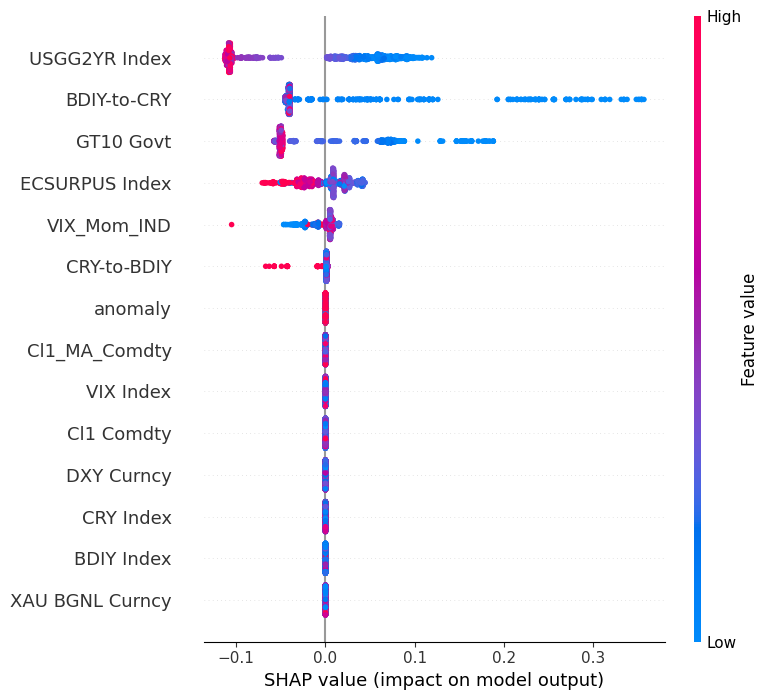

In [ ]:
shap_values = explainer(FE_df)
shap.summary_plot(shap_values, FE_df)

In [ ]:
FE_df

,XAU BGNL Curncy,ECSURPUS Index,BDIY Index,CRY Index,DXY Curncy,Cl1 Comdty,VIX Index,USGG2YR Index,GT10 Govt,Cl1_MA_Comdty,VIX_Mom_IND,CRY-to-BDIY,BDIY-to-CRY,anomaly
38,283.25,0.077,1388.0,157.260,100.560,25.77,22.50,6.428,6.657,29.507,-0.044444,0.113300,8.826148,-1
39,287.65,0.043,1405.0,165.010,101.860,28.85,21.50,6.465,6.748,29.507,-0.044444,0.117445,8.514635,-1
40,287.15,0.135,1368.0,167.240,102.410,28.28,23.02,6.432,6.692,29.507,0.070698,0.122251,8.179861,-1
41,282.75,0.191,1311.0,166.850,104.920,28.22,23.45,6.574,6.619,29.507,0.018679,0.127269,7.857357,-1
42,298.40,0.312,1277.0,165.430,104.220,28.02,21.25,6.678,6.613,29.507,-0.093817,0.129546,7.719277,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,1727.96,0.339,2271.0,184.502,92.336,57.76,20.30,0.145,1.622,58.675,0.025771,0.081243,12.308810,1
1145,1685.56,0.303,2103.0,184.874,93.297,60.55,19.61,0.147,1.706,59.432,-0.033990,0.087910,11.375315,1
1146,1743.28,0.440,2092.0,185.839,92.335,59.33,18.12,0.157,1.658,60.104,-0.075982,0.088833,11.257056,1
1147,1742.69,0.467,2140.0,188.137,91.852,60.18,16.65,0.159,1.616,60.646,-0.081126,0.087914,11.374690,1


# Creating a STRATEGY based on the unseen data

In [ ]:
import yfinance as yf